In [1]:
import pandas, numpy
import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

# 0. user-defined variables

In [2]:
data_file ='/home/adrian/projects/HUVECs/data/csv/HUVEC_AllMeasurements_Summary_21.12.2020.Extracellular_compiled.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file, header = 1)
df.head()

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Na+,Cl-,Glucose,Lactate,Glutamine,...,Aspartic ac,MS Glutamin,MS Glutamic ac,Ornithine,Lysine,Citrulline,Glycin NL,XLeu/Ile/Hopro,Methylhistidin,Phenylalanine
0,NaN,NaN,NaN,NaN,NaN,mM,mM,uM,uM,uM,...,uM,uM,uM,uM,uM,uM,uM,uM,uM,uM
1,1,2,0.0,0.0,480000,121,111,5800,300,2061.07033855966,...,100.16,1422.455,1577.685,31.58,1509.19,3.705,633.275,842.7,2.165,156.8
2,2,2,0.5,0.0,480000,120,110,5900,400,13548.1023587988,...,114.53,1576.49,1738.505,34.935,1673.355,4.86,737.03,929.685,2.04,171.59
3,3,2,5.0,0.0,480000,121,111,5900,300,1379.5430799426,...,104.79,1597.895,1618.63,31.085,1770.46,4.49,746.875,926.1,2.375,166.795
4,4,2,50.0,0.0,480000,120,112,6200,700,1459.60347346998,...,103.17,1624.73,1547.505,29.82,1858.57,4.695,691.83,871.235,1.72,160.115


# 2. format data

## 2.1. select appropriate columns

In [4]:
selected_columns = [0, 1, 2, 3, 4] + [7, 8]
df = df.iloc[:, selected_columns]
df

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Glucose,Lactate
0,NaN,NaN,NaN,NaN,NaN,uM,uM
1,1,2,0.0,0.0,480000,5800,300
2,2,2,0.5,0.0,480000,5900,400
3,3,2,5.0,0.0,480000,5900,300
4,4,2,50.0,0.0,480000,6200,700
...,...,...,...,...,...,...,...
168,100um-4.3,EC024,50.0,4.0,2100000,4400,1300
169,100um-24.1,EC024,50.0,24.0,2100000,3200,4900
170,100um-24.2,EC024,50.0,24.0,2100000,3300,4600
171,100um-24.3,EC024,50.0,24.0,2100000,3400,4500


## 2.1. select appropriate rows

In [5]:
df.drop([0], inplace=True)
df.drop(list(range(141, 171+1)), inplace=True)

In [6]:
wdf = df[df['Cell numbers'].str.isnumeric() == True]
wdf['Cell numbers'] = wdf['Cell numbers'].astype(float)

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
wdf['Glucose'][wdf['Glucose'] == '-'] = float('nan')
wdf['Lactate'][wdf['Lactate'] == '-'] = float('nan')

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/adrian/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [8]:
wdf['Glucose'] = wdf['Glucose'].astype(float)
wdf['Lactate'] = wdf['Lactate'].astype(float)

wdf['Treatment'] = wdf['Treatment'].astype(float)
wdf['Timepoint (h)'] = wdf['Timepoint (h)'].astype(float)

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [9]:
pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
print(wdf)

    Sample ID  Experiment  Treatment  Timepoint (h)  Cell numbers  Glucose  \
1            1          2        0.0            0.0      480000.0   5800.0   
2            2          2        0.5            0.0      480000.0   5900.0   
3            3          2        5.0            0.0      480000.0   5900.0   
4            4          2       50.0            0.0      480000.0   6200.0   
5            5          2        0.0            4.0      560000.0   4700.0   
6            6          2        0.0            4.0      560000.0   4600.0   
7            7          2        0.0            4.0      560000.0   4900.0   
8            8          2        0.5            4.0      510000.0   4900.0   
9            9          2        0.5            4.0      510000.0   4800.0   
10          10          2        0.5            4.0      510000.0   4600.0   
11          11          2        5.0            4.0      380000.0   5100.0   
12          12          2        5.0            4.0      380000.

# 3. analysis

In [10]:
unique_experiments = list(set(wdf['Experiment'].tolist()))
unique_experiments.sort()
unique_experiments

['2', '3', '5', '6', '7']

In [11]:
quant = []
for time in [4, 24]:
    for treatment in [0, 0.5, 5, 50]:
        box = []
        for experiment in unique_experiments:
            
            if time == 4:
                time_reference = 0
            elif time == 24:
                time_reference = 4
            else:
                raise ValueError('unrecognized time value')
                
            ###
            ### cell numbers for both metabolites
            ###
                
            cn_current = wdf[(wdf['Treatment'] == treatment) & (wdf['Timepoint (h)'] == time) & (wdf['Experiment'] == experiment)]['Cell numbers'].astype(float).values
            cn_reference = wdf[(wdf['Treatment'] == treatment) & (wdf['Timepoint (h)'] == time_reference) & (wdf['Experiment'] == experiment)]['Cell numbers'].astype(float).values
            
            cnc = 1e6/cn_current
            cnr = 1e6/cn_reference
            
            ###
            ### glucose
            ###
            
            glucose_fvs = wdf[(wdf['Treatment'] == treatment) & (wdf['Timepoint (h)'] == time) & (wdf['Experiment'] == experiment)]['Glucose'].astype(float).values
            glucose_fvs_reference = wdf[(wdf['Treatment'] == treatment) & (wdf['Timepoint (h)'] == time_reference) & (wdf['Experiment'] == experiment)]['Glucose'].astype(float).values
            
            glu_current = glucose_fvs*cnc
            glu_reference = glucose_fvs_reference*cnr
            
            glu_consumption = numpy.nanmean(glu_current) - numpy.nanmean(glu_reference)
            
            ###
            ### lactate
            ###
            
            lactate_fvs = wdf[(wdf['Treatment'] == treatment) & (wdf['Timepoint (h)'] == time) & (wdf['Experiment'] == experiment)]['Lactate'].astype(float).values
            lactate_fvs_reference = wdf[(wdf['Treatment'] == treatment) & (wdf['Timepoint (h)'] == time_reference) & (wdf['Experiment'] == experiment)]['Lactate'].astype(float).values
            
            lac_current = lactate_fvs*cnc
            lac_reference = lactate_fvs_reference*cnr
            
            lac_secretion = numpy.nanmean(lac_current) - numpy.nanmean(lac_reference)
            
            ###
            ### ratio
            ###
            
            ratio = abs(lac_secretion/glu_consumption)
            box.append(ratio)
            
            ###
            ### checks
            ###
            
#             print(time, treatment, experiment)
#             print('glucose fvs', glucose_fvs)
#             print('glucose fvs ref', glucose_fvs_reference)
#             print('cn current and reference', cn_current, cn_reference)
#             print('glu current and reference', glu_current, glu_reference)
#             print('glu consumption', glu_consumption)
            
#             print('lac fvs', lactate_fvs, lactate_fvs_reference)
#             print('lac', lac_current, lac_reference)
#             print('lac secretion', lac_secretion)
#             print('ratio', ratio)
#         print()
        
        ###
        ### building quant
        ###
        quant.append(box)

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mea

 # 4. plot

[[1.221311475409836, 0.6557377049180326], [1.5589459084604713, 1.1949640287769778], [1.1952078928823113], [0.4855595667870037], [0.9379477250726043, 0.12731774125579434, 0.5263577214181385, 1.686046511627907], [1.4226782314364286, 0.35055374175788995, 0.8421172973590945, 0.026065014101232072], [1.071852479864349, 0.0374733327149615, 1.1670203091846014, 2.431937393060503], [0.7029131309596711, 0.08864523322802444, 0.544537380356989]]
[0.9379477250726043, 0.12731774125579434, 0.5263577214181385, 1.686046511627907]
[1.4226782314364286, 0.35055374175788995, 0.8421172973590945, 0.026065014101232072]

[0.9379477250726043, 0.12731774125579434, 0.5263577214181385, 1.686046511627907]
[1.071852479864349, 0.0374733327149615, 1.1670203091846014, 2.431937393060503]

[0.9379477250726043, 0.12731774125579434, 0.5263577214181385, 1.686046511627907]
[0.7029131309596711, 0.08864523322802444, 0.544537380356989]



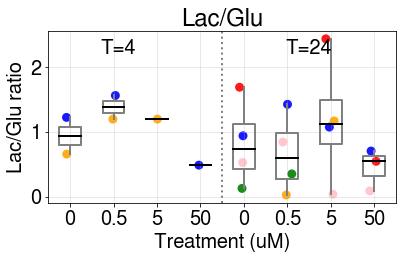

In [27]:
f = matplotlib.pyplot.figure()
ax = f.add_subplot(111)

###
### boxplots
####

filtered = []
for element in quant:
    new = []
    for sub in element:
        if numpy.isnan(sub) == False:
            if numpy.isinf(sub) == False:
                if sub < 3:
                    new.append(sub)
    filtered.append(new)
print(filtered)

bx = matplotlib.pyplot.boxplot(filtered, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))

###
### scatter plots
###

the_colors = ['blue', 'green', 'pink', 'orange', 'red']

x=[]; y=[]; exp_colors=[]
for i in range(len(quant)):
    for j in range(len(quant[i])):
        
        if quant[i][j] < 3:
          
            shift = 0.25
            r=-shift/2 + shift*numpy.random.random()
            x.append(i+1+r)

            y.append(quant[i][j])

            exp_colors.append(the_colors[j])

matplotlib.pyplot.scatter(x, y, s=80, c=exp_colors, alpha=0.9, linewidths=0)

###
### statistics
###

for pos in [5, 6, 7]:
    print(filtered[4])
    print(filtered[pos])
    print()
    stat, pvalue = scipy.stats.mannwhitneyu(filtered[4], filtered[pos])
    if 0.01 < pvalue < 0.05:
        print(pos, 'significant', numpy.mean(filtered[4]), numpy.mean(filtered[pos]), pvalue)
        matplotlib.pyplot.text(pos/8.4, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
    if pvalue < 0.01:
        print(pos, 'very significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
        matplotlib.pyplot.text(pos/8.4, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)

###
### close figure
###

matplotlib.pyplot.text(0.20, 0.9, 'T=4', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
matplotlib.pyplot.text(0.75, 0.9, 'T=24', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    
matplotlib.pyplot.axvline(4.5, alpha=0.5, lw=2, color='black', ls=':')

matplotlib.pyplot.grid(alpha=1/3)

matplotlib.pyplot.xlabel('Treatment (uM)')
matplotlib.pyplot.ylabel('Lac/Glu ratio')
matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['0', '0.5', '5', '50', '0', '0.5', '5', '50'])
matplotlib.pyplot.title('Lac/Glu')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()